# *Unsupervised Learning* 

# *Questions 5 & 6* 

## Importing the necessary libraries 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, HDBSCAN, MeanShift, AffinityPropagation, MiniBatchKMeans, AgglomerativeClustering, BisectingKMeans, DBSCAN, HDBSCAN, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score

import warnings
warnings.filterwarnings('ignore')

In [203]:
#Loading and reading the dataset
df = pd.read_csv(r"C:\Users\ramam\Desktop\Final_students_data.csv")
df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...,1
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...,2
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...,0
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...,1
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is...",2


## Data Cleaning

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        257 non-null    object
 1   Year                        257 non-null    int64 
 2   Programming Languages       257 non-null    object
 3   Certifications              257 non-null    object
 4   Project Count               257 non-null    int64 
 5   Extracurricular Activities  257 non-null    object
 6   Career Interest             257 non-null    object
 7   Bio                         257 non-null    object
 8   Cluster                     257 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 18.2+ KB


In [205]:
#Checking for any missing values
df.isnull().sum

<bound method DataFrame.sum of       Name   Year  Programming Languages  Certifications  Project Count  \
0    False  False                  False           False          False   
1    False  False                  False           False          False   
2    False  False                  False           False          False   
3    False  False                  False           False          False   
4    False  False                  False           False          False   
..     ...    ...                    ...             ...            ...   
252  False  False                  False           False          False   
253  False  False                  False           False          False   
254  False  False                  False           False          False   
255  False  False                  False           False          False   
256  False  False                  False           False          False   

     Extracurricular Activities  Career Interest    Bio  Cluster  
0

In [206]:
#Identifying duplicates
df[df.duplicated()]

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster


In [207]:
#Checking for special characters or trail spaces in the dataset
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts(), '\n')

Value counts for column: Name
Name
Omar Sami         2
Yasmin Nassar     2
Laila Mansour     1
Karim Saad        1
Bilal Hassan      1
                 ..
Basil Al-Daoud    1
Mohammad Fawaz    1
Khaled Rashid     1
Maha Faris        1
Layla Mohammed    1
Name: count, Length: 255, dtype: int64 

Value counts for column: Year
Year
2    99
3    78
4    40
1    40
Name: count, dtype: int64 

Value counts for column: Programming Languages
Programming Languages
Python; R; SQL                   45
Python; SQL; R                   27
Python; C++; SQL                 21
JavaScript; Python; SQL          19
Java; Python; SQL                15
Python; Java; SQL                14
Python; SQL; C++                 13
R; Python; SQL                   12
Python; C++; Java                 9
Python; Java; C                   8
Python; SQL; Java                 7
C++; Python; Java                 6
Java; SQL; Python                 5
JavaScript; SQL; Python           5
Java; Python; HTML                5


We also have to seprate the classes from the data.

In [208]:
labels = df['Cluster']
df = df.drop('Cluster', axis=1)
df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is..."


'Bios' is a column with textual data, encoding such column is tedious and would increase the data diemnsionality, which is why
I will be dropping it and using the other columns to cluster the students. 

In [209]:
df = df.drop(columns=['Bio'])
df.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst


Dropping the name column because it adds no context or information to help the models. It similar to having just an index to every row.

In [210]:
df = df.drop('Name', axis = 1)
df.head()

,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest
0,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist
1,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst
2,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer
3,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist
4,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst


The data is now clean and ready to be prepared.

## Data Preparing

In [211]:
#Encoding the programming languages column but since its a string im going to seperat them as 8 individual columns one for each language. 
# If the stundent knows that language the value for it would be 1 and if they do not it will be 0. 
# Splitting the column into lists of languages
df['Programming Languages'] = df['Programming Languages'].apply(lambda x: x.split('; '))

# Create a new dataframe where each language has its own column
languages_df = df['Programming Languages'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

# Concatenate the new columns to the original dataframe (dropping the 'Programming Languages' column)
df = pd.concat([df.drop(columns=['Programming Languages']), languages_df], axis=1)

# Display the resulting dataframe
df.head()

,Year,Certifications,Project Count,Extracurricular Activities,Career Interest,Python,R,SQL,Java,C++,HTML,C,JavaScript,CSS,Network Security,C#
0,2,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,1,1,1,0,0,0,0,0,0,0,0
1,4,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,0,0,0,1,1,1,0,0,0,0,0
2,1,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,1,0,0,0,0,0,1,1,0,0,0
3,2,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,1,1,1,0,0,0,0,0,0,0,0
4,3,CEH,5,Tech Community Member,Cybersecurity Analyst,1,0,1,1,0,0,0,0,0,0,0


In [212]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to 'Certifications' and 'Career Interest'
df['Certifications'] = le.fit_transform(df['Certifications'])
df['Career Interest'] = le.fit_transform(df['Career Interest'])
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
# Display the resulting dataframe
df.head()

,Year,Certifications,Project Count,Extracurricular Activities,Career Interest,Python,R,SQL,Java,C++,HTML,C,JavaScript,CSS,Network Security,C#
0,2,74,4,3,15,1,1,1,0,0,0,0,0,0,0,0
1,4,33,5,51,9,0,0,0,1,1,1,0,0,0,0,0
2,1,112,3,128,34,1,0,0,0,0,0,1,1,0,0,0
3,2,74,4,178,15,1,1,1,0,0,0,0,0,0,0,0
4,3,16,5,160,9,1,0,1,1,0,0,0,0,0,0,0


In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled= pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Year,Certifications,Project Count,Extracurricular Activities,Career Interest,Python,R,SQL,Java,C++,HTML,C,JavaScript,CSS,Network Security,C#
0,-0.492000,0.006745,0.000000,-1.570826,-0.473007,0.201211,1.373914,0.527832,-0.678401,-0.593828,-0.201211,-0.282545,-0.448257,-0.0625,-0.125739,-0.0625
1,1.651118,-0.881607,1.236835,-0.739414,-1.075300,-4.969909,-0.727847,-1.894541,1.474055,1.683990,4.969909,-0.282545,-0.448257,-0.0625,-0.125739,-0.0625
2,-1.563559,0.830095,-1.236835,0.594308,1.434254,0.201211,-0.727847,-1.894541,-0.678401,-0.593828,-0.201211,3.539254,2.230862,-0.0625,-0.125739,-0.0625
3,-0.492000,0.006745,0.000000,1.460362,-0.473007,0.201211,1.373914,0.527832,-0.678401,-0.593828,-0.201211,-0.282545,-0.448257,-0.0625,-0.125739,-0.0625
4,0.579559,-1.249948,1.236835,1.148582,-1.075300,0.201211,-0.727847,0.527832,1.474055,-0.593828,-0.201211,-0.282545,-0.448257,-0.0625,-0.125739,-0.0625


## K-Means

In [214]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df_scaled)
clusters=kmeans.predict(df_scaled)
print("Kmeans Clustering trained.")

Kmeans Clustering trained.


## Evaluation

In [215]:
ARI_Score = adjusted_rand_score(labels, clusters)
print("ARI score: ", ARI_Score)
AMI_Score = adjusted_mutual_info_score(labels,clusters)
print("AMI score: ", AMI_Score)
sil_score = silhouette_score(df_scaled, clusters)
print("Silhouette score: ", sil_score)
CH_score = calinski_harabasz_score(df_scaled, clusters)
print("CH score: ", CH_score)
DB_index = davies_bouldin_score(df_scaled, clusters)
print("DB index: ", DB_index)

ARI score:  0.4904735567481855
AMI score:  0.588546213635023
Silhouette score:  0.23563232180192625
CH score:  38.8072495620671
DB index:  1.8276518604626057


## LDA

In [216]:
clf = LinearDiscriminantAnalysis()
model_lda = clf.fit_transform(df_scaled, labels)
print(f"Shape after applying LDA: {model_lda.shape}")

Shape after applying LDA: (257, 2)


In [217]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(model_lda)
clusters=kmeans.predict(model_lda)
print("Kmeans with LDA Clustering trained.")

Kmeans with LDA Clustering trained.


In [218]:
ARI_Score = adjusted_rand_score(labels, clusters)
print("ARI score: ", ARI_Score)
AMI_Score = adjusted_mutual_info_score(labels,clusters)
print("AMI score: ", AMI_Score)
sil_score = silhouette_score(model_lda, clusters)
print("Silhouette score: ", sil_score)
CH_score = calinski_harabasz_score(model_lda, clusters)
print("CH score: ", CH_score)
DB_index = davies_bouldin_score(model_lda, clusters)
print("DB index: ", DB_index)

ARI score:  1.0
AMI score:  1.0
Silhouette score:  1.0
CH score:  5.448257177688174e+32
DB index:  1.3269092620089052e-08


## PCA

In [219]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(df_scaled)
print(f"Shape after applying PCA: {X_pca.shape}")

Shape after applying PCA: (257, 4)


## K-Means on PCA

In [220]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X_pca)
clusters=kmeans.predict(X_pca)
print("Kmeans with PCA Clustering trained.")

Kmeans with PCA Clustering trained.


## Evaluation

In [221]:
ARI_Score = adjusted_rand_score(labels, clusters)
print("ARI score: ", ARI_Score)
AMI_Score = adjusted_mutual_info_score(labels,clusters)
print("AMI score: ", AMI_Score)
sil_score = silhouette_score(X_pca, clusters)
print("Silhouette score: ", sil_score)
CH_score = calinski_harabasz_score(X_pca, clusters)
print("CH score: ", CH_score)
DB_index = davies_bouldin_score(X_pca, clusters)
print("DB index: ", DB_index)

ARI score:  0.9313108432809386
AMI score:  0.9119526264698354
Silhouette score:  0.4503492916604333
CH score:  138.49902410549103
DB index:  0.9270425138958277


## Different clustering algorithms on the scaled data:

In [222]:
silhouette_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}           
ari_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}      
ami_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}   
ch_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}    
db_index_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}

for i in range(5):
    print(f"\nRun {i + 1}:")

    # kmeans
    kmeans = KMeans()
    clusters_kmeans = kmeans.fit_predict(df_scaled)
    ARI_kmeans = adjusted_rand_score(labels, clusters_kmeans)
    ari_scores['kmeans'].append(ARI_kmeans)
    AMI_kmeans = adjusted_mutual_info_score(labels, clusters_kmeans)
    ami_scores['kmeans'].append(AMI_kmeans)
    sil_score_kmeans = silhouette_score(df_scaled, clusters_kmeans)
    silhouette_scores['kmeans'].append(sil_score_kmeans)
    CH_score_kmeans = calinski_harabasz_score(df_scaled, clusters_kmeans)
    ch_scores['kmeans'].append(CH_score_kmeans)
    DB_index_kmeans = davies_bouldin_score(df_scaled, clusters_kmeans)
    db_index_scores['kmeans'].append(DB_index_kmeans)
    print(f"kmeans - ARI: {ARI_kmeans:.4f}, AMI: {AMI_kmeans:.4f}, Silhouette: {sil_score_kmeans:.4f}, CH: {CH_score_kmeans:.4f}, DB Index: {DB_index_kmeans:.4f}")

    # DBSCAN
    dbscan = DBSCAN()
    clusters_dbscan = dbscan.fit_predict(df_scaled)
    ARI_dbscan = adjusted_rand_score(labels, clusters_dbscan)
    AMI_dbscan = adjusted_mutual_info_score(labels, clusters_dbscan)
    sil_score_dbscan = silhouette_score(df_scaled, clusters_dbscan)
    CH_score_dbscan = calinski_harabasz_score(df_scaled, clusters_dbscan)
    DB_index_dbscan = davies_bouldin_score(df_scaled, clusters_dbscan)

    silhouette_scores['DBSCAN'].append(sil_score_dbscan)
    ari_scores['DBSCAN'].append(ARI_dbscan)
    ami_scores['DBSCAN'].append(AMI_dbscan)
    ch_scores['DBSCAN'].append(CH_score_dbscan)
    db_index_scores['DBSCAN'].append(DB_index_dbscan)
    print(f"DBSCAN - ARI: {ARI_dbscan:.4f}, AMI: {AMI_dbscan:.4f}, Silhouette: {sil_score_dbscan:.4f}, CH: {CH_score_dbscan:.4f}, DB Index: {DB_index_dbscan:.4f}")

    # HDBSCAN
    hdbscan = HDBSCAN()
    clusters_hdbscan = hdbscan.fit_predict(df_scaled)
    ARI_hdbscan = adjusted_rand_score(labels, clusters_hdbscan)
    AMI_hdbscan = adjusted_mutual_info_score(labels, clusters_hdbscan)
    sil_score_hdbscan = silhouette_score(df_scaled, clusters_hdbscan)
    CH_score_hdbscan = calinski_harabasz_score(df_scaled, clusters_hdbscan)
    DB_index_hdbscan = davies_bouldin_score(df_scaled, clusters_hdbscan)
    
    silhouette_scores['HDBSCAN'].append(sil_score_hdbscan)
    ari_scores['HDBSCAN'].append(ARI_hdbscan)
    ami_scores['HDBSCAN'].append(AMI_hdbscan)
    ch_scores['HDBSCAN'].append(CH_score_hdbscan)
    db_index_scores['HDBSCAN'].append(DB_index_hdbscan)
    print(f"HDBSCAN - ARI: {ARI_hdbscan:.4f}, AMI: {AMI_hdbscan:.4f}, Silhouette: {sil_score_hdbscan:.4f}, CH: {CH_score_hdbscan:.4f}, DB Index: {DB_index_hdbscan:.4f}")

    # OPTICS
    optics = OPTICS()
    clusters_optics = optics.fit_predict(df_scaled)
    ARI_optics = adjusted_rand_score(labels, clusters_optics)
    AMI_optics = adjusted_mutual_info_score(labels, clusters_optics)
    sil_score_optics = silhouette_score(df_scaled, clusters_optics)
    CH_score_optics = calinski_harabasz_score(df_scaled, clusters_optics)
    DB_index_optics = davies_bouldin_score(df_scaled, clusters_optics)

    silhouette_scores['OPTICS'].append(sil_score_optics)
    ari_scores['OPTICS'].append(ARI_optics)
    ami_scores['OPTICS'].append(AMI_optics)
    ch_scores['OPTICS'].append(CH_score_optics)
    db_index_scores['OPTICS'].append(DB_index_optics)
    print(f"OPTICS - ARI: {ARI_optics:.4f}, AMI: {AMI_optics:.4f}, Silhouette: {sil_score_optics:.4f}, CH: {CH_score_optics:.4f}, DB Index: {DB_index_optics:.4f}")

    # BisectKMeans
    bisect_kmeans = BisectingKMeans(n_clusters=4)
    clusters_bisect_kmeans = bisect_kmeans.fit_predict(df_scaled)
    sil_score_bisect_kmeans = silhouette_score(df_scaled, clusters_bisect_kmeans)
    ARI_bisect_kmeans = adjusted_rand_score(labels, clusters_bisect_kmeans)
    AMI_bisect_kmeans = adjusted_mutual_info_score(labels, clusters_bisect_kmeans)
    CH_score_bisect_kmeans = calinski_harabasz_score(df_scaled, clusters_bisect_kmeans)
    DB_index_bisect_kmeans = davies_bouldin_score(df_scaled, clusters_bisect_kmeans)

    silhouette_scores['BisectKMeans'].append(sil_score_bisect_kmeans)
    ari_scores['BisectKMeans'].append(ARI_bisect_kmeans)
    ami_scores['BisectKMeans'].append(AMI_bisect_kmeans)
    ch_scores['BisectKMeans'].append(CH_score_bisect_kmeans)
    db_index_scores['BisectKMeans'].append(DB_index_bisect_kmeans)
    print(f"BisectKMeans - ARI: {ARI_bisect_kmeans:.4f}, AMI: {AMI_bisect_kmeans:.4f}, Silhouette: {sil_score_bisect_kmeans:.4f}, CH: {CH_score_bisect_kmeans:.4f}, DB Index: {DB_index_bisect_kmeans:.4f}")


Run 1:
kmeans - ARI: 0.6829, AMI: 0.7573, Silhouette: 0.2972, CH: 43.3962, DB Index: 1.1863
DBSCAN - ARI: 0.0613, AMI: 0.2593, Silhouette: -0.1411, CH: 4.8517, DB Index: 1.4223
HDBSCAN - ARI: 0.2072, AMI: 0.4588, Silhouette: 0.2046, CH: 13.9688, DB Index: 1.6467
OPTICS - ARI: 0.0677, AMI: 0.3457, Silhouette: 0.0892, CH: 9.6220, DB Index: 1.5048
BisectKMeans - ARI: 0.5129, AMI: 0.6371, Silhouette: 0.2873, CH: 42.7447, DB Index: 1.5055

Run 2:
kmeans - ARI: 0.7073, AMI: 0.7802, Silhouette: 0.3437, CH: 54.1267, DB Index: 1.1290
DBSCAN - ARI: 0.0613, AMI: 0.2593, Silhouette: -0.1411, CH: 4.8517, DB Index: 1.4223
HDBSCAN - ARI: 0.2072, AMI: 0.4588, Silhouette: 0.2046, CH: 13.9688, DB Index: 1.6467
OPTICS - ARI: 0.0677, AMI: 0.3457, Silhouette: 0.0892, CH: 9.6220, DB Index: 1.5048
BisectKMeans - ARI: 0.9716, AMI: 0.9568, Silhouette: 0.2578, CH: 49.3182, DB Index: 1.1958

Run 3:
kmeans - ARI: 0.6838, AMI: 0.7511, Silhouette: 0.3491, CH: 47.2760, DB Index: 1.1459
DBSCAN - ARI: 0.0613, AMI: 0.

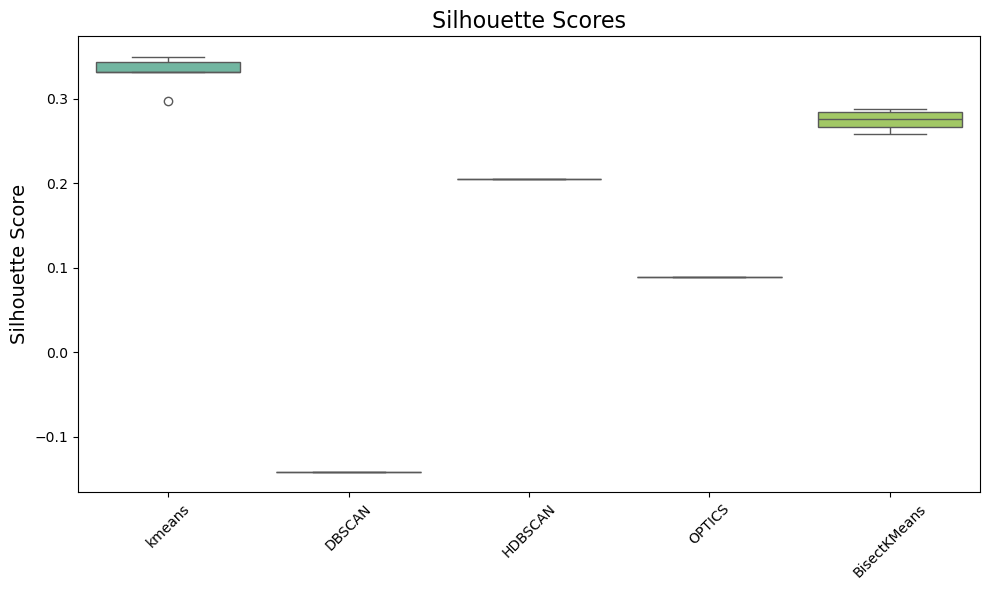

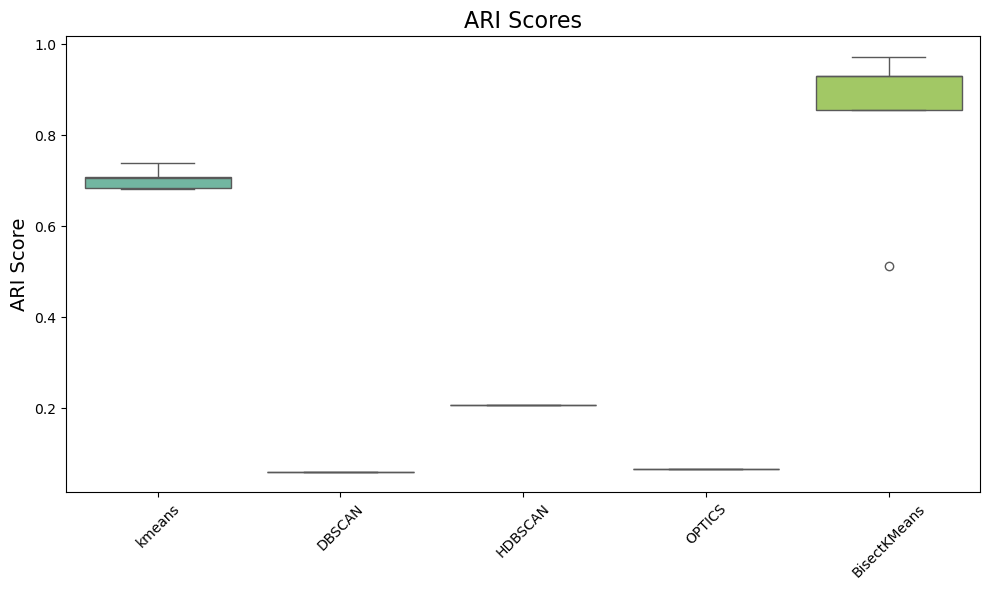

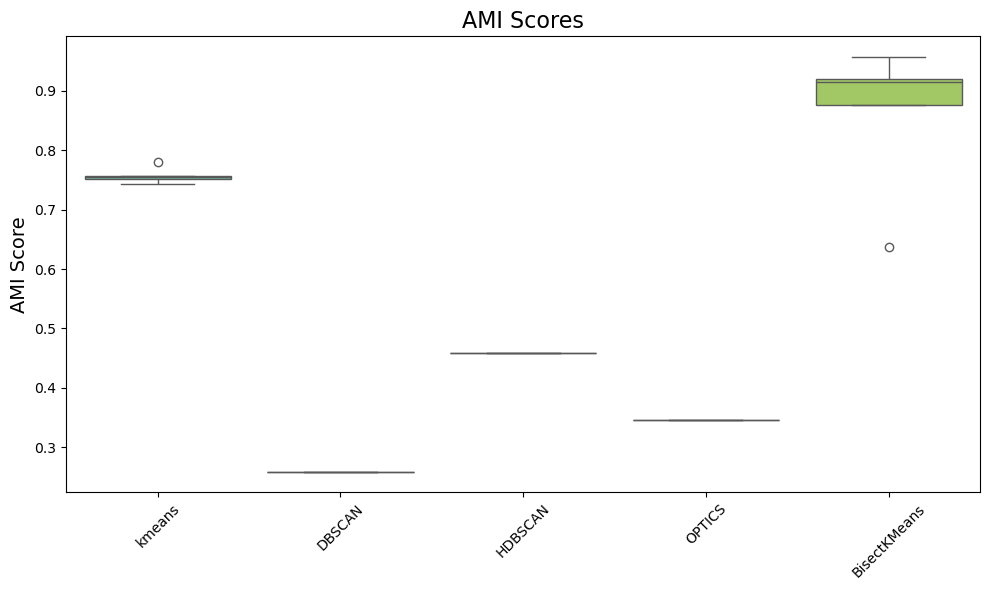

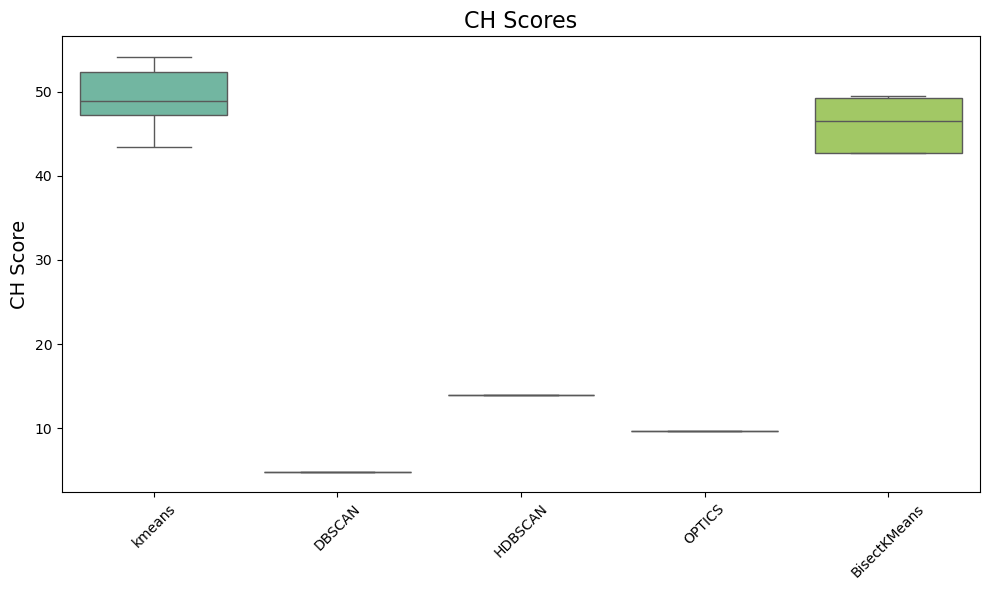

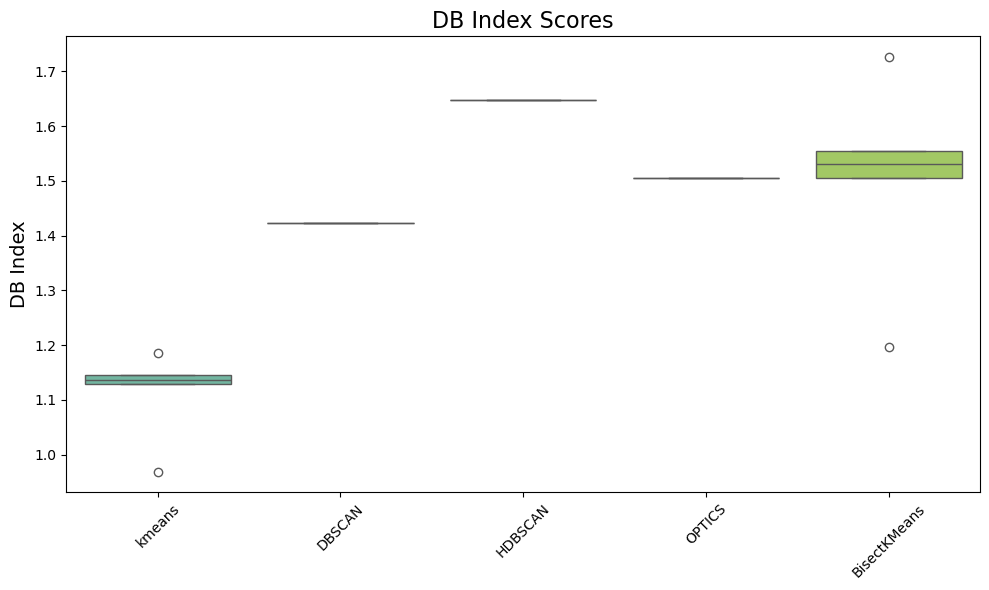

In [223]:
# Plot for Silhouette Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=silhouette_scores, palette="Set2")
plt.title("Silhouette Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Silhouette Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for ARI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_scores, palette="Set2")
plt.title("ARI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ARI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for AMI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ami_scores, palette="Set2")
plt.title("AMI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("AMI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for CH Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ch_scores, palette="Set2")
plt.title("CH Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("CH Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for DB Index Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_index_scores, palette="Set2")
plt.title("DB Index Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("DB Index", fontsize=14)
plt.tight_layout()
plt.show()

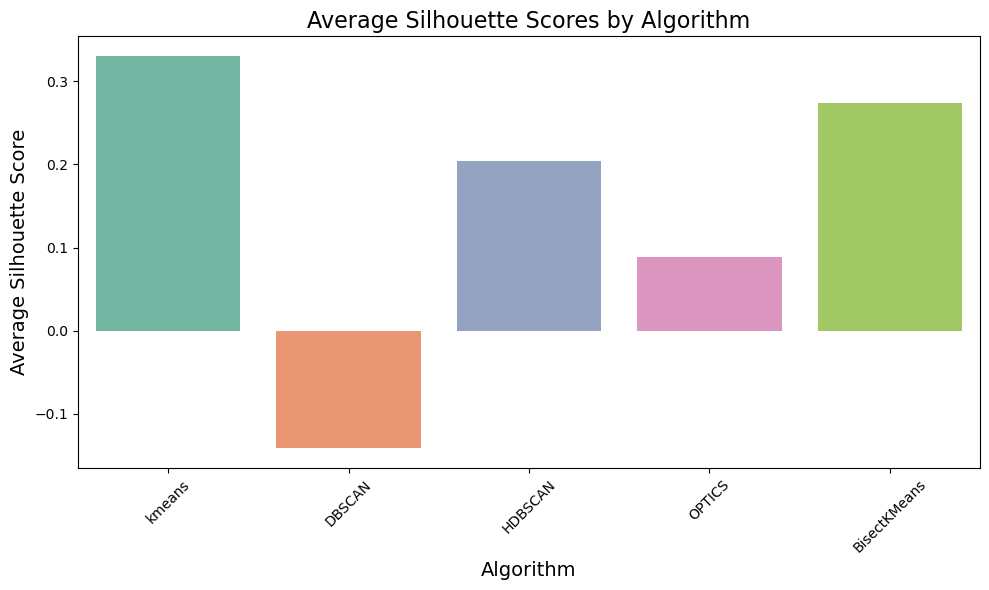

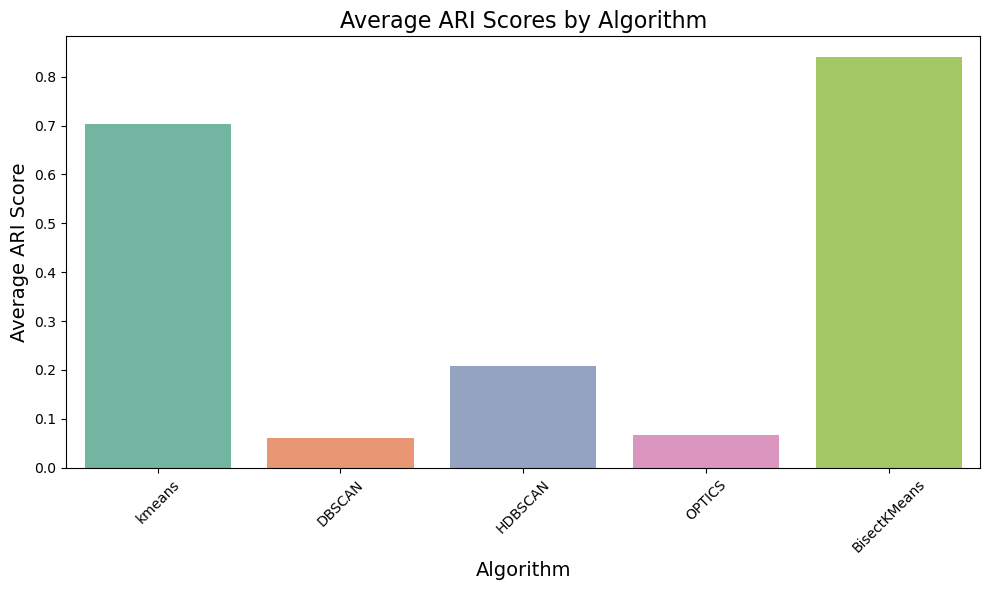

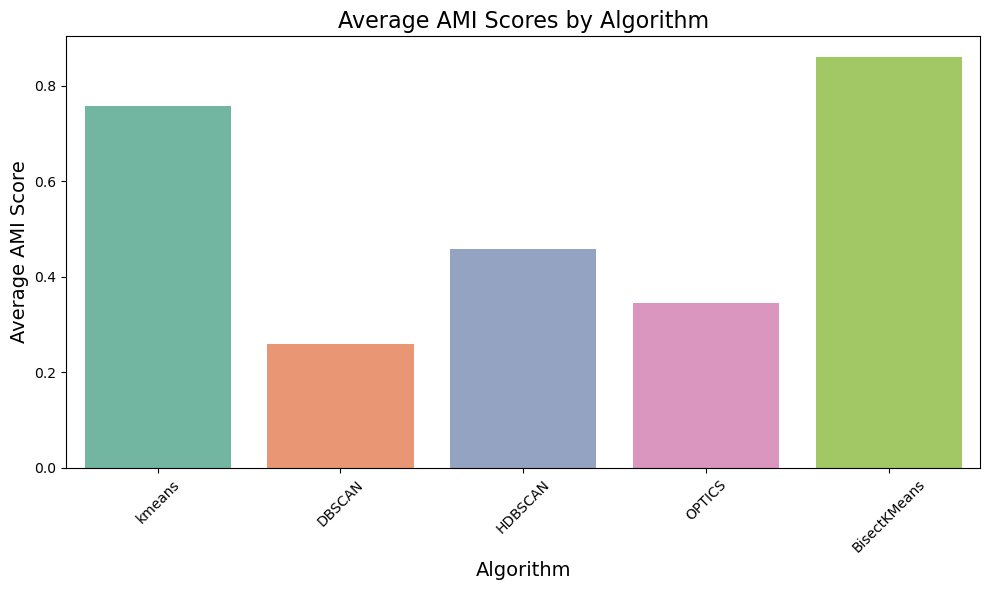

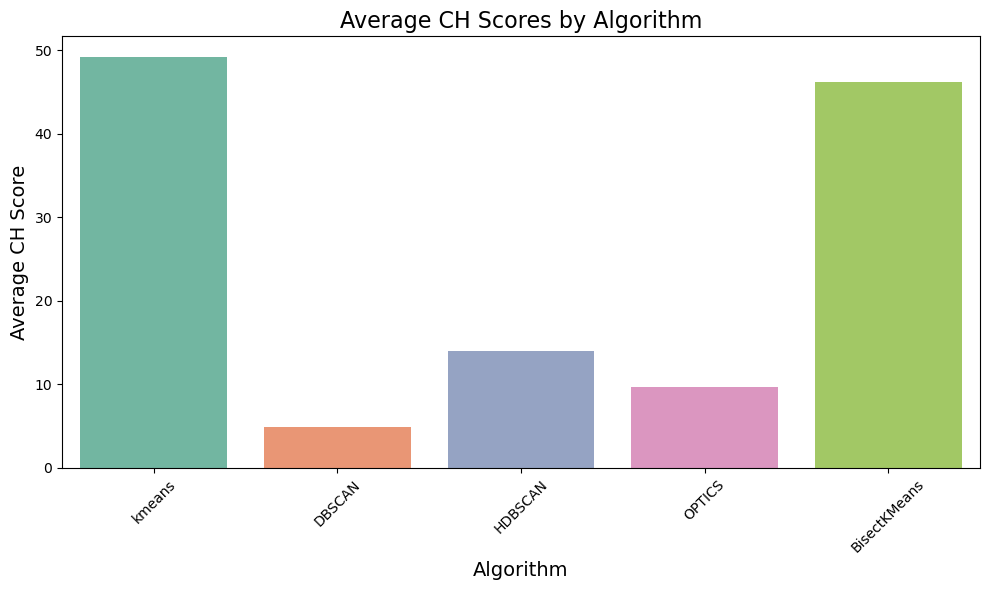

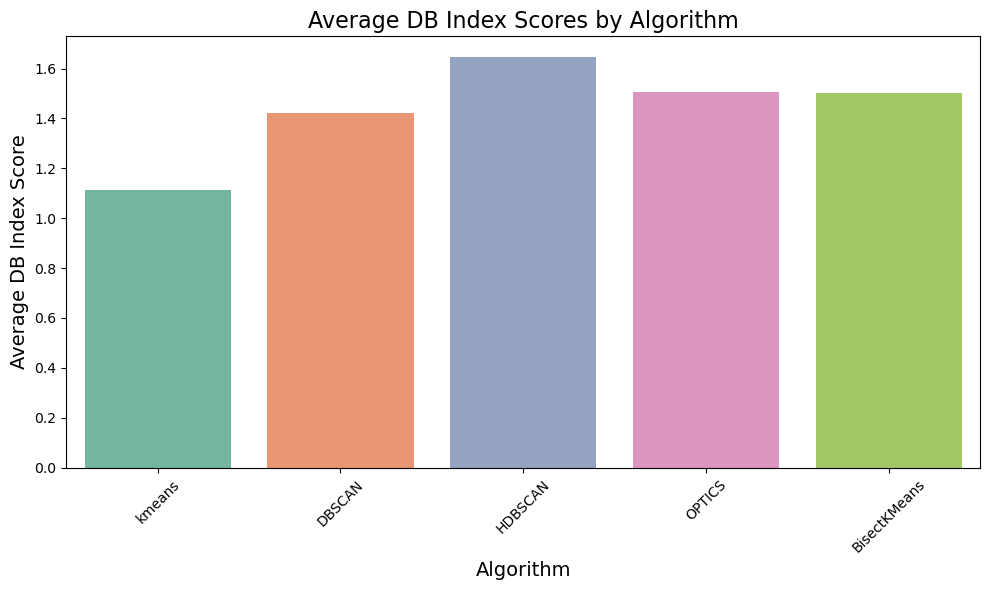

In [224]:
def calculate_average_scores(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}

silhouette_avg = calculate_average_scores(silhouette_scores)
ari_avg = calculate_average_scores(ari_scores)
ami_avg = calculate_average_scores(ami_scores)
ch_avg = calculate_average_scores(ch_scores)
db_index_avg = calculate_average_scores(db_index_scores)

# Plot Silhouette Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_avg.keys()), y=list(silhouette_avg.values()), palette="Set2")
plt.title("Average Silhouette Scores by Algorithm", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ARI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ari_avg.keys()), y=list(ari_avg.values()), palette="Set2")
plt.title("Average ARI Scores by Algorithm", fontsize=16)
plt.ylabel("Average ARI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ami_avg.keys()), y=list(ami_avg.values()), palette="Set2")
plt.title("Average AMI Scores by Algorithm", fontsize=16)
plt.ylabel("Average AMI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot CH Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ch_avg.keys()), y=list(ch_avg.values()), palette="Set2")
plt.title("Average CH Scores by Algorithm", fontsize=16)
plt.ylabel("Average CH Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot DB Index Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(db_index_avg.keys()), y=list(db_index_avg.values()), palette="Set2")
plt.title("Average DB Index Scores by Algorithm", fontsize=16)
plt.ylabel("Average DB Index Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [225]:
def calculate_averages(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}
silhouette_avg = calculate_averages(silhouette_scores)
ari_avg = calculate_averages(ari_scores)
ami_avg = calculate_averages(ami_scores)
ch_avg = calculate_averages(ch_scores)
db_avg = calculate_averages(db_index_scores)

comparison_table = pd.DataFrame({
    "Silhouette Score": silhouette_avg,
    "ARI Score": ari_avg,
    "AMI Score": ami_avg,
    "CH Score": ch_avg,
    "DB Score": db_avg,
})

# Display the table
print(comparison_table)

              Silhouette Score  ARI Score  AMI Score   CH Score  DB Score
kmeans                0.330502   0.703674   0.757230  49.203297  1.113479
DBSCAN               -0.141090   0.061348   0.259298   4.851744  1.422317
HDBSCAN               0.204580   0.207206   0.458843  13.968795  1.646729
OPTICS                0.089200   0.067727   0.345713   9.622028  1.504849
BisectKMeans          0.274351   0.840414   0.860897  46.177271  1.502553


## Different algorithms on LDA data:

In [228]:
silhouette_scores1 = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': [],}
ari_scores1 = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': [],}
ami_scores1 = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': [],}
ch_scores1 = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': [],}
db_index_scores1 = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': [],}

for i in range(5):
    print(f"\nRun {i + 1}:")

    # kmeans
    kmeans = KMeans()
    clusters_kmeans = kmeans.fit_predict(model_lda)  # Use model_lda here
    ARI_kmeans = adjusted_rand_score(labels, clusters_kmeans)
    AMI_kmeans = adjusted_mutual_info_score(labels, clusters_kmeans)
    sil_score_kmeans = silhouette_score(model_lda, clusters_kmeans)
    CH_score_kmeans = calinski_harabasz_score(model_lda, clusters_kmeans)
    DB_index_kmeans = davies_bouldin_score(model_lda, clusters_kmeans)

    ari_scores['kmeans'].append(ARI_kmeans)
    ami_scores['kmeans'].append(AMI_kmeans)
    silhouette_scores1['kmeans'].append(sil_score_kmeans)
    ch_scores['kmeans'].append(CH_score_kmeans)
    db_index_scores['kmeans'].append(DB_index_kmeans)
    print(f"kmeans - ARI: {ARI_kmeans:.4f}, AMI: {AMI_kmeans:.4f}, Silhouette: {sil_score_kmeans:.4f}, CH: {CH_score_kmeans:.4f}, DB Index: {DB_index_kmeans:.4f}")

    # DBSCAN
    dbscan = DBSCAN()
    clusters_dbscan = dbscan.fit_predict(model_lda)
    ARI_dbscan = adjusted_rand_score(labels, clusters_dbscan)
    AMI_dbscan = adjusted_mutual_info_score(labels, clusters_dbscan)
    sil_score_dbscan = silhouette_score(model_lda, clusters_dbscan)
    CH_score_dbscan = calinski_harabasz_score(model_lda, clusters_dbscan)
    DB_index_dbscan = davies_bouldin_score(model_lda, clusters_dbscan)

    ari_scores['DBSCAN'].append(ARI_dbscan)
    ami_scores['DBSCAN'].append(AMI_dbscan)
    silhouette_scores['DBSCAN'].append(sil_score_dbscan)
    ch_scores['DBSCAN'].append(CH_score_dbscan)
    db_index_scores['DBSCAN'].append(DB_index_dbscan)
    print(f"DBSCAN - ARI: {ARI_dbscan:.4f}, AMI: {AMI_dbscan:.4f}, Silhouette: {sil_score_dbscan:.4f}, CH: {CH_score_dbscan:.4f}, DB Index: {DB_index_dbscan:.4f}")

    # HDBSCAN
    hdbscan = HDBSCAN()
    clusters_hdbscan = hdbscan.fit_predict(model_lda)
    ARI_hdbscan = adjusted_rand_score(labels, clusters_hdbscan)
    AMI_hdbscan = adjusted_mutual_info_score(labels, clusters_hdbscan)
    sil_score_hdbscan = silhouette_score(model_lda, clusters_hdbscan)
    CH_score_hdbscan = calinski_harabasz_score(model_lda, clusters_hdbscan)
    DB_index_hdbscan = davies_bouldin_score(model_lda, clusters_hdbscan)

    ari_scores['HDBSCAN'].append(ARI_hdbscan)
    ami_scores['HDBSCAN'].append(AMI_hdbscan)
    silhouette_scores['HDBSCAN'].append(sil_score_hdbscan)
    ch_scores['HDBSCAN'].append(CH_score_hdbscan)
    db_index_scores['HDBSCAN'].append(DB_index_hdbscan)
    print(f"HDBSCAN - ARI: {ARI_hdbscan:.4f}, AMI: {AMI_hdbscan:.4f}, Silhouette: {sil_score_hdbscan:.4f}, CH: {CH_score_hdbscan:.4f}, DB Index: {DB_index_hdbscan:.4f}")

    # OPTICS
    optics = OPTICS()
    clusters_optics = optics.fit_predict(model_lda)
    ARI_optics = adjusted_rand_score(labels, clusters_optics)
    AMI_optics = adjusted_mutual_info_score(labels, clusters_optics)
    sil_score_optics = silhouette_score(model_lda, clusters_optics)
    CH_score_optics = calinski_harabasz_score(model_lda, clusters_optics)
    DB_index_optics = davies_bouldin_score(model_lda, clusters_optics)

    ari_scores['OPTICS'].append(ARI_optics)
    ami_scores['OPTICS'].append(AMI_optics)
    silhouette_scores['OPTICS'].append(sil_score_optics)
    ch_scores['OPTICS'].append(CH_score_optics)
    db_index_scores['OPTICS'].append(DB_index_optics)
    print(f"OPTICS - ARI: {ARI_optics:.4f}, AMI: {AMI_optics:.4f}, Silhouette: {sil_score_optics:.4f}, CH: {CH_score_optics:.4f}, DB Index: {DB_index_optics:.4f}")

    # BisectKMeans
    bisect_kmeans = BisectingKMeans(n_clusters=4)
    clusters_bisect_kmeans = bisect_kmeans.fit_predict(model_lda)
    sil_score_bisect_kmeans = silhouette_score(model_lda, clusters_bisect_kmeans)
    ARI_bisect_kmeans = adjusted_rand_score(labels, clusters_bisect_kmeans)
    AMI_bisect_kmeans = adjusted_mutual_info_score(labels, clusters_bisect_kmeans)
    CH_score_bisect_kmeans = calinski_harabasz_score(model_lda, clusters_bisect_kmeans)
    DB_index_bisect_kmeans = davies_bouldin_score(model_lda, clusters_bisect_kmeans)

    silhouette_scores['BisectKMeans'].append(sil_score_bisect_kmeans)
    ari_scores['BisectKMeans'].append(ARI_bisect_kmeans)
    ami_scores['BisectKMeans'].append(AMI_bisect_kmeans)
    ch_scores['BisectKMeans'].append(CH_score_bisect_kmeans)
    db_index_scores['BisectKMeans'].append(DB_index_bisect_kmeans)
    print(f"BisectKMeans - ARI: {ARI_bisect_kmeans:.4f}, AMI: {AMI_bisect_kmeans:.4f}, Silhouette: {sil_score_bisect_kmeans:.4f}, CH: {CH_score_bisect_kmeans:.4f}, DB Index: {DB_index_bisect_kmeans:.4f}")



Run 1:
kmeans - ARI: 1.0000, AMI: 1.0000, Silhouette: 1.0000, CH: 544825717768817375152746050617344.0000, DB Index: 0.0000
DBSCAN - ARI: 1.0000, AMI: 1.0000, Silhouette: 1.0000, CH: 544825717768817375152746050617344.0000, DB Index: 0.0000
HDBSCAN - ARI: 0.7408, AMI: 0.7399, Silhouette: 0.6537, CH: 110208205678945800183165906583552.0000, DB Index: 0.5455
OPTICS - ARI: 0.7427, AMI: 0.7427, Silhouette: 0.6537, CH: 111217808149438161736229720162304.0000, DB Index: 0.4545
BisectKMeans - ARI: 1.0000, AMI: 1.0000, Silhouette: 1.0000, CH: 544825717768817375152746050617344.0000, DB Index: 0.0000

Run 2:
kmeans - ARI: 1.0000, AMI: 1.0000, Silhouette: 1.0000, CH: 544825717768817375152746050617344.0000, DB Index: 0.0000
DBSCAN - ARI: 1.0000, AMI: 1.0000, Silhouette: 1.0000, CH: 544825717768817375152746050617344.0000, DB Index: 0.0000
HDBSCAN - ARI: 0.7408, AMI: 0.7399, Silhouette: 0.6537, CH: 110208205678945800183165906583552.0000, DB Index: 0.5455
OPTICS - ARI: 0.7427, AMI: 0.7427, Silhouette: 0

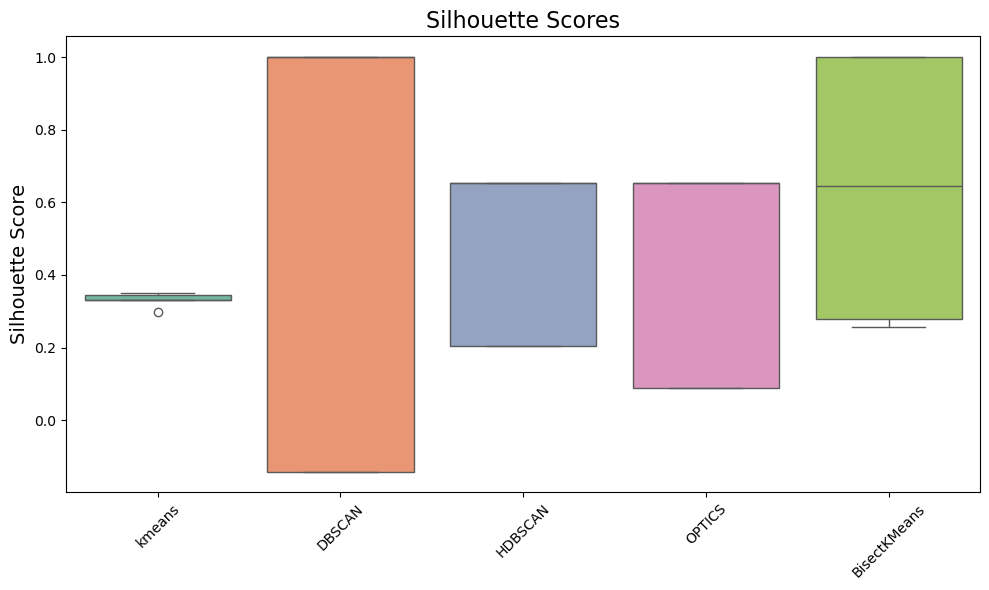

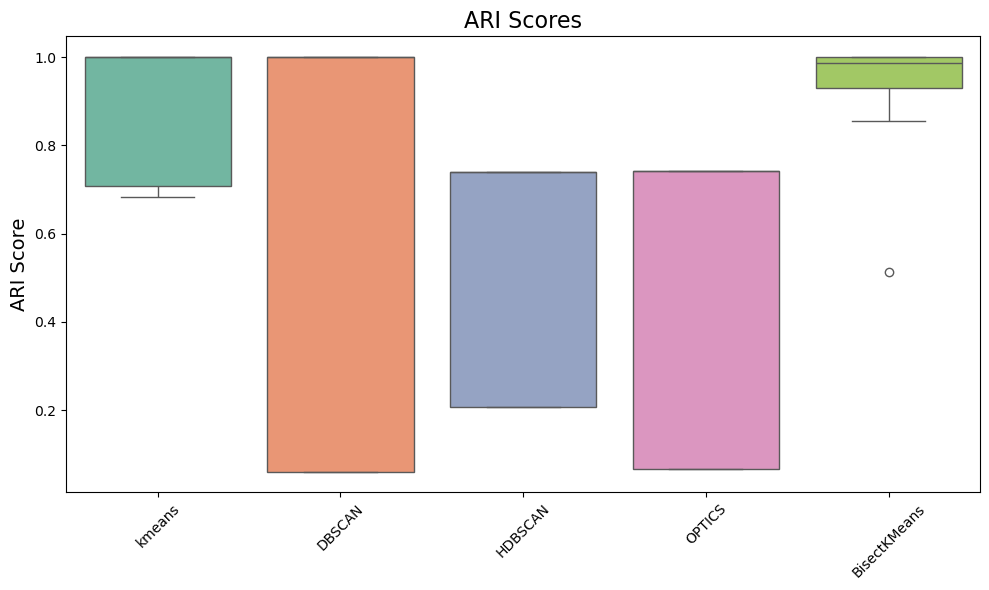

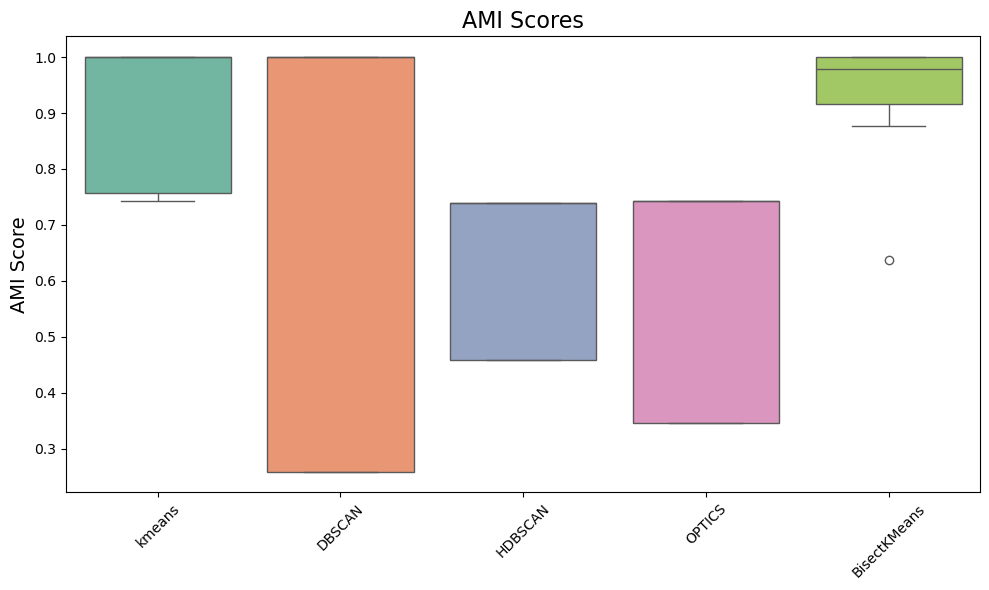

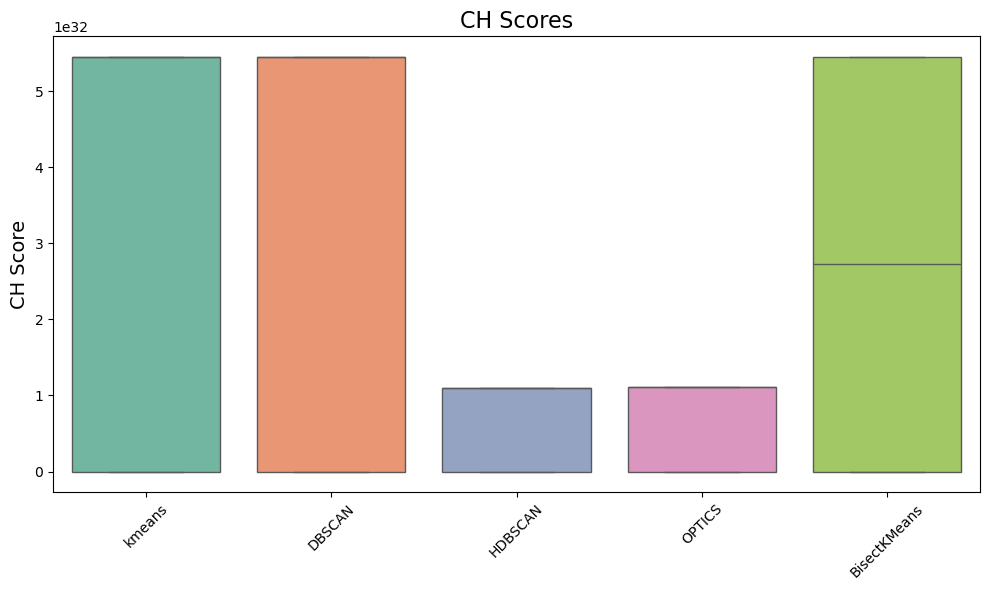

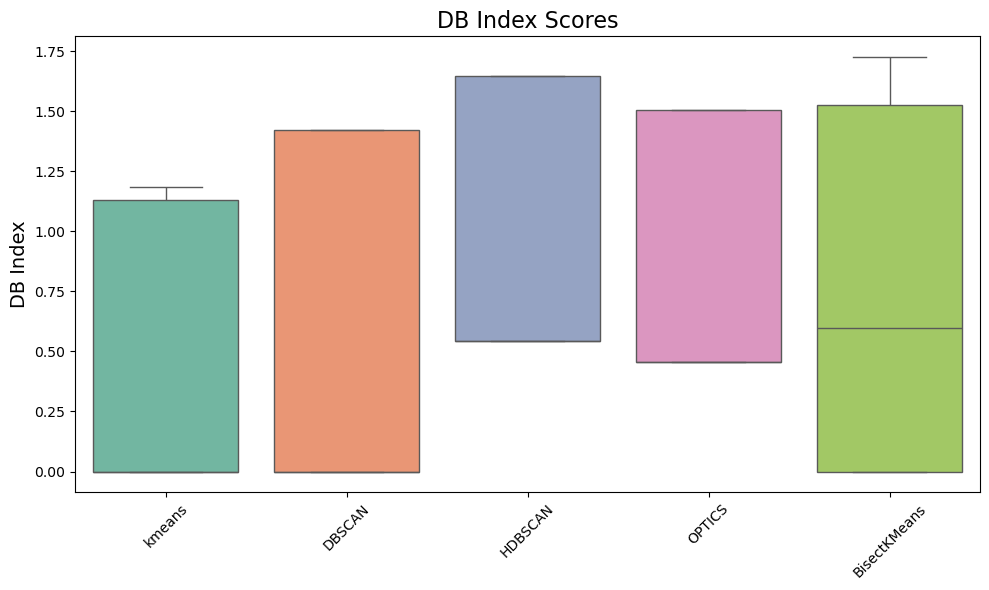

In [229]:
# Plot for Silhouette Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=silhouette_scores, palette="Set2")
plt.title("Silhouette Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Silhouette Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for ARI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_scores, palette="Set2")
plt.title("ARI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ARI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for AMI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ami_scores, palette="Set2")
plt.title("AMI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("AMI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for CH Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ch_scores, palette="Set2")
plt.title("CH Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("CH Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for DB Index Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_index_scores, palette="Set2")
plt.title("DB Index Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("DB Index", fontsize=14)
plt.tight_layout()
plt.show()

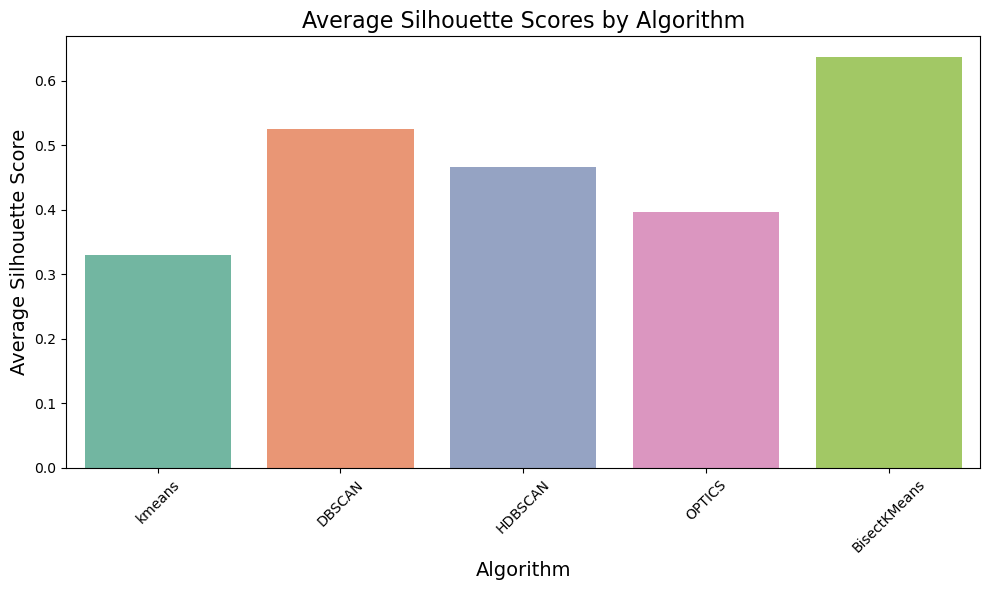

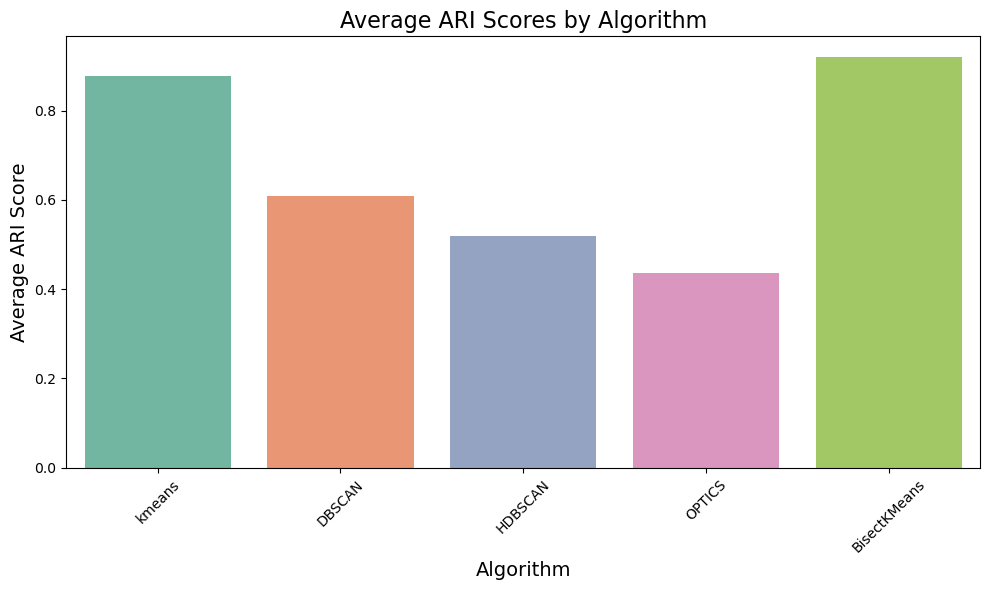

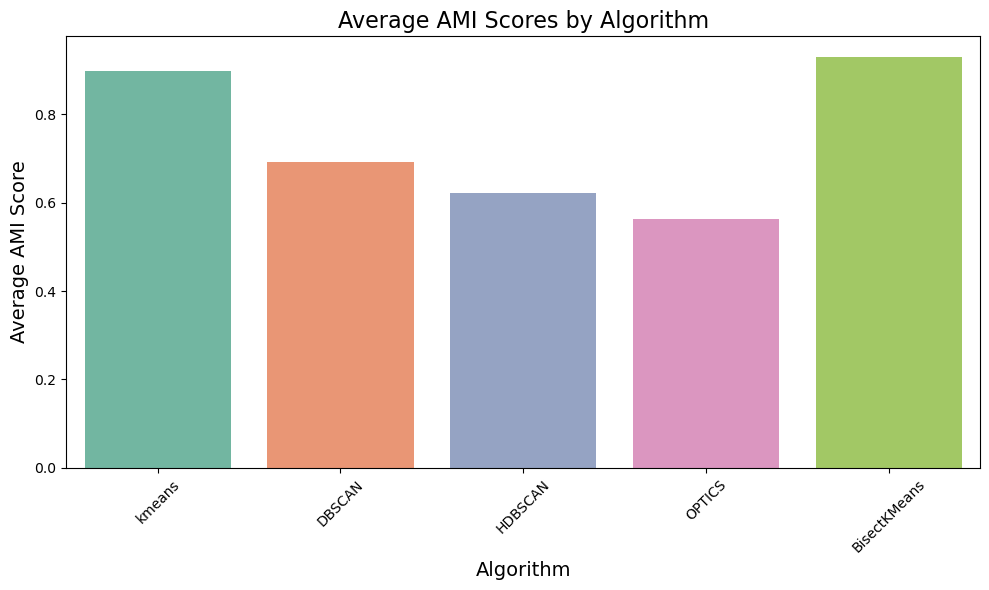

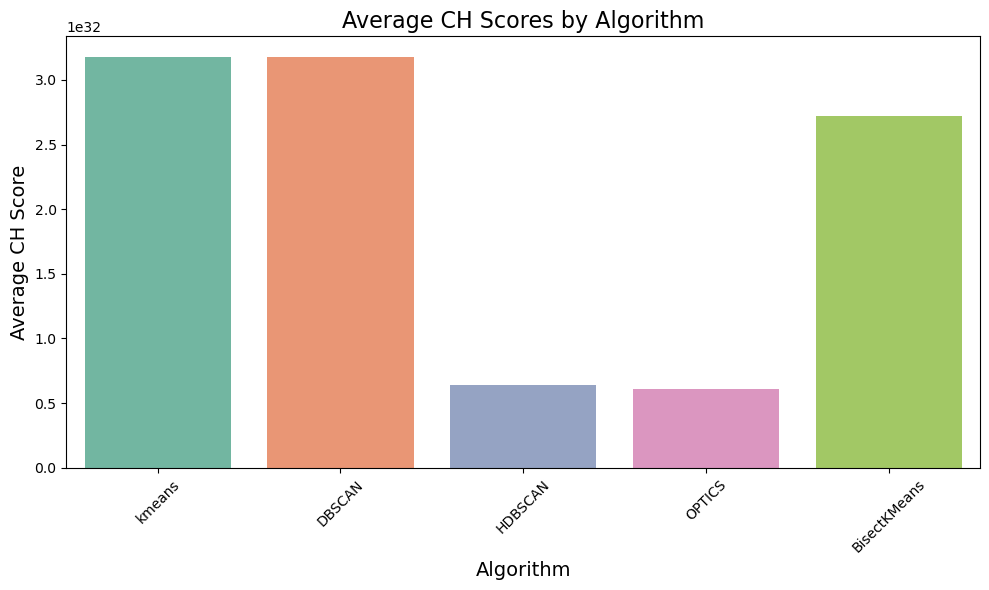

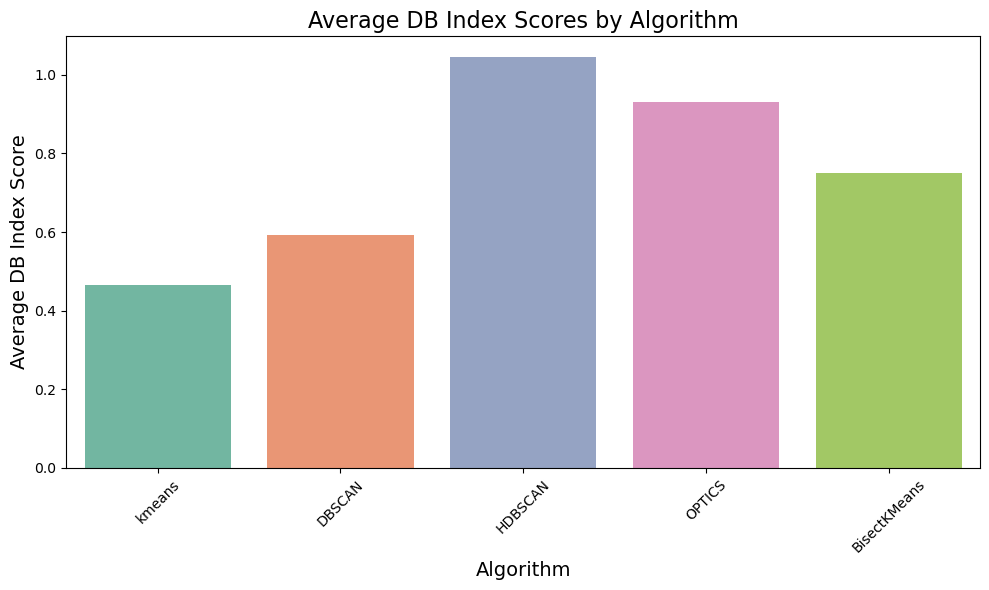

In [231]:
def calculate_average_scores(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}

silhouette_avg = calculate_average_scores(silhouette_scores)
ari_avg = calculate_average_scores(ari_scores)
ami_avg = calculate_average_scores(ami_scores)
ch_avg = calculate_average_scores(ch_scores)
db_index_avg = calculate_average_scores(db_index_scores)

# Plot Silhouette Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_avg.keys()), y=list(silhouette_avg.values()), palette="Set2")
plt.title("Average Silhouette Scores by Algorithm", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ARI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ari_avg.keys()), y=list(ari_avg.values()), palette="Set2")
plt.title("Average ARI Scores by Algorithm", fontsize=16)
plt.ylabel("Average ARI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ami_avg.keys()), y=list(ami_avg.values()), palette="Set2")
plt.title("Average AMI Scores by Algorithm", fontsize=16)
plt.ylabel("Average AMI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot CH Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ch_avg.keys()), y=list(ch_avg.values()), palette="Set2")
plt.title("Average CH Scores by Algorithm", fontsize=16)
plt.ylabel("Average CH Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot DB Index Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(db_index_avg.keys()), y=list(db_index_avg.values()), palette="Set2")
plt.title("Average DB Index Scores by Algorithm", fontsize=16)
plt.ylabel("Average DB Index Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [232]:
def calculate_averages(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}
silhouette_avg = calculate_averages(silhouette_scores)
ari_avg = calculate_averages(ari_scores)
ami_avg = calculate_averages(ami_scores)
ch_avg = calculate_averages(ch_scores)
db_avg = calculate_averages(db_index_scores)

comparison_table = pd.DataFrame({
    "Silhouette Score": silhouette_avg,
    "ARI Score": ari_avg,
    "AMI Score": ami_avg,
    "CH Score": ch_avg,
    "DB Score": db_avg,
})
print(comparison_table)

              Silhouette Score  ARI Score  AMI Score      CH Score  DB Score
kmeans                0.330502   0.876531   0.898846  3.178150e+32  0.463949
DBSCAN                0.524546   0.608895   0.691374  3.178150e+32  0.592632
HDBSCAN               0.466565   0.518467   0.622822  6.428812e+31  1.046034
OPTICS                0.397107   0.435874   0.562235  6.066426e+31  0.931956
BisectKMeans          0.637175   0.920207   0.930448  2.724129e+32  0.751277


K-means and BisectKMeans outperform other models, particularly excelling in Silhouette and ARI scores. On the other hand, DBSCAN and OPTICS exhibit lower ARI and AMI scores, suggesting these density-based models may not be well-suited for the data. HDBSCAN, however, performs reasonably well across most metrics, with competitive AMI and ARI results. Overall, the KMeans family of algorithms, including BisectKMeans, generally provides better clustering results compared to the density-based models like DBSCAN and OPTICS.

## Different algorithms on PCA data:

In [233]:
silhouette_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}
ari_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}
ami_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}
ch_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}
db_index_scores = {'kmeans': [], 'DBSCAN': [], 'HDBSCAN': [], 'OPTICS': [], 'BisectKMeans': []}

for i in range(5):
    print(f"\nRun {i + 1}:")

    # kmeans
    kmeans = KMeans()
    clusters_kmeans = kmeans.fit_predict(X_pca)
    ARI_kmeans = adjusted_rand_score(labels, clusters_kmeans)
    AMI_kmeans = adjusted_mutual_info_score(labels, clusters_kmeans)
    sil_score_kmeans = silhouette_score(X_pca, clusters_kmeans)
    CH_score_kmeans = calinski_harabasz_score(X_pca, clusters_kmeans)
    DB_index_kmeans = davies_bouldin_score(X_pca, clusters_kmeans)

    silhouette_scores['kmeans'].append(sil_score_kmeans)
    ari_scores['kmeans'].append(ARI_kmeans)
    ami_scores['kmeans'].append(AMI_kmeans)
    ch_scores['kmeans'].append(CH_score_kmeans)
    db_index_scores['kmeans'].append(DB_index_kmeans)
    print(f"kmeans - ARI: {ARI_kmeans:.4f}, AMI: {AMI_kmeans:.4f}, Silhouette: {sil_score_kmeans:.4f}, CH: {CH_score_kmeans:.4f}, DB Index: {DB_index_kmeans:.4f}")

    # DBSCAN
    dbscan = DBSCAN()
    clusters_dbscan = dbscan.fit_predict(X_pca)
    ARI_dbscan = adjusted_rand_score(labels, clusters_dbscan)
    AMI_dbscan = adjusted_mutual_info_score(labels, clusters_dbscan)
    sil_score_dbscan = silhouette_score(X_pca, clusters_dbscan)
    CH_score_dbscan = calinski_harabasz_score(X_pca, clusters_dbscan)

    silhouette_scores['DBSCAN'].append(sil_score_dbscan)
    ari_scores['DBSCAN'].append(ARI_dbscan)
    ami_scores['DBSCAN'].append(AMI_dbscan)
    ch_scores['DBSCAN'].append(CH_score_dbscan)
    db_index_scores['DBSCAN'].append(DB_index_dbscan)
    print(f"DBSCAN - ARI: {ARI_dbscan:.4f}, AMI: {AMI_dbscan:.4f}, Silhouette: {sil_score_dbscan:.4f}, CH: {CH_score_dbscan:.4f}, DB Index: {DB_index_dbscan:.4f}")

    # HDBSCAN
    hdbscan = HDBSCAN()
    clusters_hdbscan = hdbscan.fit_predict(X_pca)
    ARI_hdbscan = adjusted_rand_score(labels, clusters_hdbscan)
    AMI_hdbscan = adjusted_mutual_info_score(labels, clusters_hdbscan)
    sil_score_hdbscan = silhouette_score(X_pca, clusters_hdbscan)
    CH_score_hdbscan = calinski_harabasz_score(X_pca, clusters_hdbscan)
    DB_index_hdbscan = davies_bouldin_score(X_pca, clusters_hdbscan)

    silhouette_scores['HDBSCAN'].append(sil_score_hdbscan)
    ari_scores['HDBSCAN'].append(ARI_hdbscan)
    ami_scores['HDBSCAN'].append(AMI_hdbscan)
    ch_scores['HDBSCAN'].append(CH_score_hdbscan)
    db_index_scores['HDBSCAN'].append(DB_index_hdbscan)
    print(f"HDBSCAN - ARI: {ARI_hdbscan:.4f}, AMI: {AMI_hdbscan:.4f}, Silhouette: {sil_score_hdbscan:.4f}, CH: {CH_score_hdbscan:.4f}, DB Index: {DB_index_hdbscan:.4f}")

    # OPTICS
    optics = OPTICS()
    clusters_optics = optics.fit_predict(X_pca)
    ARI_optics = adjusted_rand_score(labels, clusters_optics)
    AMI_optics = adjusted_mutual_info_score(labels, clusters_optics)
    sil_score_optics = silhouette_score(X_pca, clusters_optics)
    CH_score_optics = calinski_harabasz_score(X_pca, clusters_optics)
    DB_index_optics = davies_bouldin_score(X_pca, clusters_optics)

    silhouette_scores['OPTICS'].append(sil_score_optics)
    ari_scores['OPTICS'].append(ARI_optics)
    ami_scores['OPTICS'].append(AMI_optics)
    ch_scores['OPTICS'].append(CH_score_optics)
    db_index_scores['OPTICS'].append(DB_index_optics)
    print(f"OPTICS - ARI: {ARI_optics:.4f}, AMI: {AMI_optics:.4f}, Silhouette: {sil_score_optics:.4f}, CH: {CH_score_optics:.4f}, DB Index: {DB_index_optics:.4f}")

    # BisectKMeans
    bisect_kmeans = BisectingKMeans(n_clusters=4)
    clusters_bisect_kmeans = bisect_kmeans.fit_predict(X_pca)
    ARI_bisect_kmeans = adjusted_rand_score(labels, clusters_bisect_kmeans)
    AMI_bisect_kmeans = adjusted_mutual_info_score(labels, clusters_bisect_kmeans)
    sil_score_bisect_kmeans = silhouette_score(X_pca, clusters_bisect_kmeans)
    CH_score_bisect_kmeans = calinski_harabasz_score(X_pca, clusters_bisect_kmeans)
    DB_index_bisect_kmeans = davies_bouldin_score(X_pca, clusters_bisect_kmeans)

    silhouette_scores['BisectKMeans'].append(sil_score_bisect_kmeans)
    ari_scores['BisectKMeans'].append(ARI_bisect_kmeans)
    ami_scores['BisectKMeans'].append(AMI_bisect_kmeans)
    ch_scores['BisectKMeans'].append(CH_score_bisect_kmeans)
    db_index_scores['BisectKMeans'].append(DB_index_bisect_kmeans)
    print(f"BisectKMeans - ARI: {ARI_bisect_kmeans:.4f}, AMI: {AMI_bisect_kmeans:.4f}, Silhouette: {sil_score_bisect_kmeans:.4f}, CH: {CH_score_bisect_kmeans:.4f}, DB Index: {DB_index_bisect_kmeans:.4f}")



Run 1:
kmeans - ARI: 0.6641, AMI: 0.7283, Silhouette: 0.5059, CH: 145.2661, DB Index: 0.9257
DBSCAN - ARI: 0.5577, AMI: 0.6249, Silhouette: 0.4124, CH: 45.9470, DB Index: 1.2227
HDBSCAN - ARI: 0.5601, AMI: 0.6263, Silhouette: 0.4360, CH: 45.5263, DB Index: 1.3150
OPTICS - ARI: 0.0780, AMI: 0.3615, Silhouette: 0.0636, CH: 14.8319, DB Index: 1.2678
BisectKMeans - ARI: 0.8334, AMI: 0.8101, Silhouette: 0.4720, CH: 137.8011, DB Index: 0.9500

Run 2:
kmeans - ARI: 0.7377, AMI: 0.7560, Silhouette: 0.5118, CH: 144.0826, DB Index: 0.8556
DBSCAN - ARI: 0.5577, AMI: 0.6249, Silhouette: 0.4124, CH: 45.9470, DB Index: 1.2227
HDBSCAN - ARI: 0.5601, AMI: 0.6263, Silhouette: 0.4360, CH: 45.5263, DB Index: 1.3150
OPTICS - ARI: 0.0780, AMI: 0.3615, Silhouette: 0.0636, CH: 14.8319, DB Index: 1.2678
BisectKMeans - ARI: 0.8012, AMI: 0.8015, Silhouette: 0.4340, CH: 110.3628, DB Index: 1.2468

Run 3:
kmeans - ARI: 0.6496, AMI: 0.7173, Silhouette: 0.5275, CH: 164.1820, DB Index: 0.8460
DBSCAN - ARI: 0.5577, 

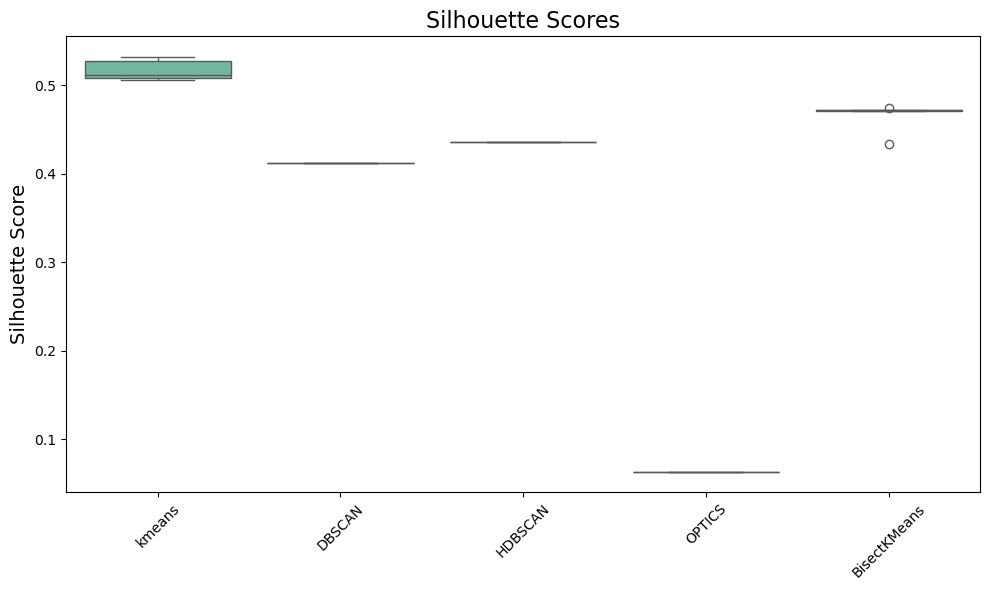

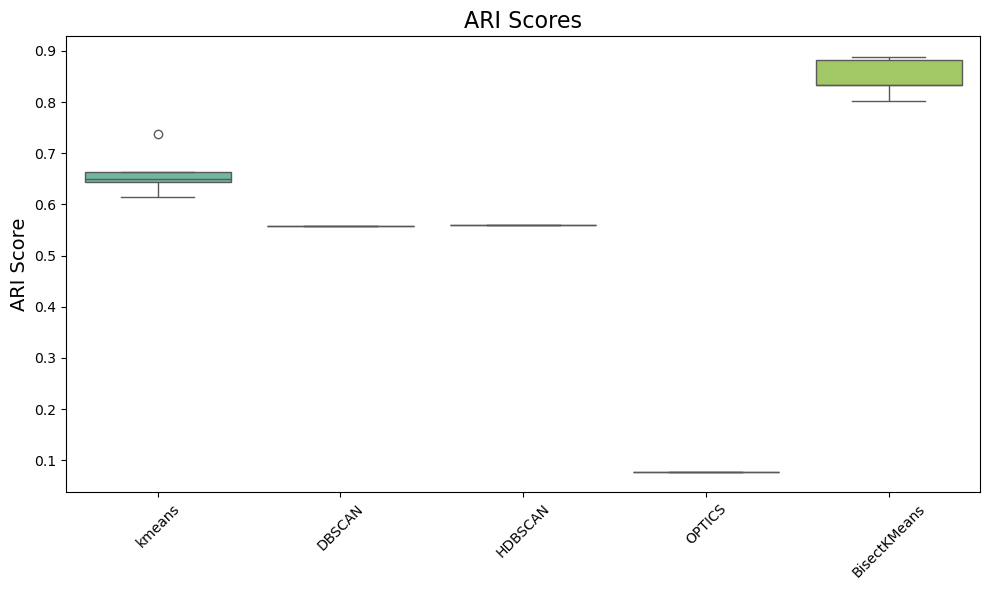

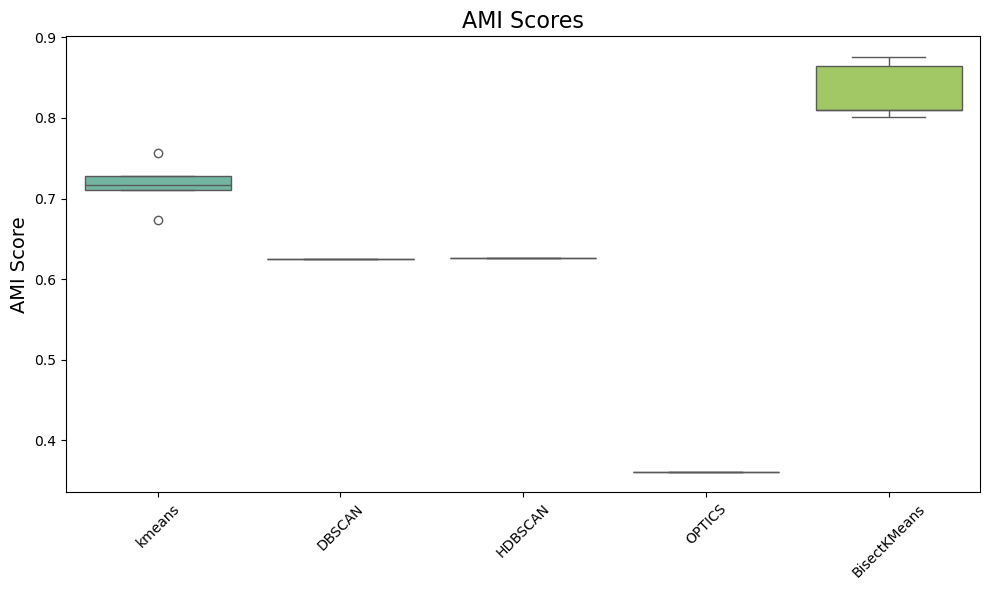

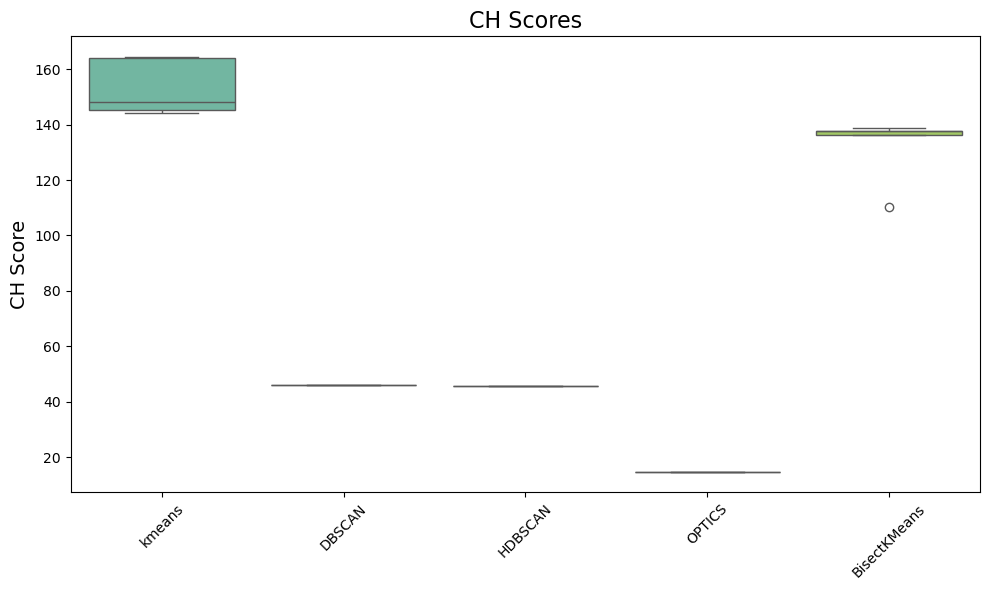

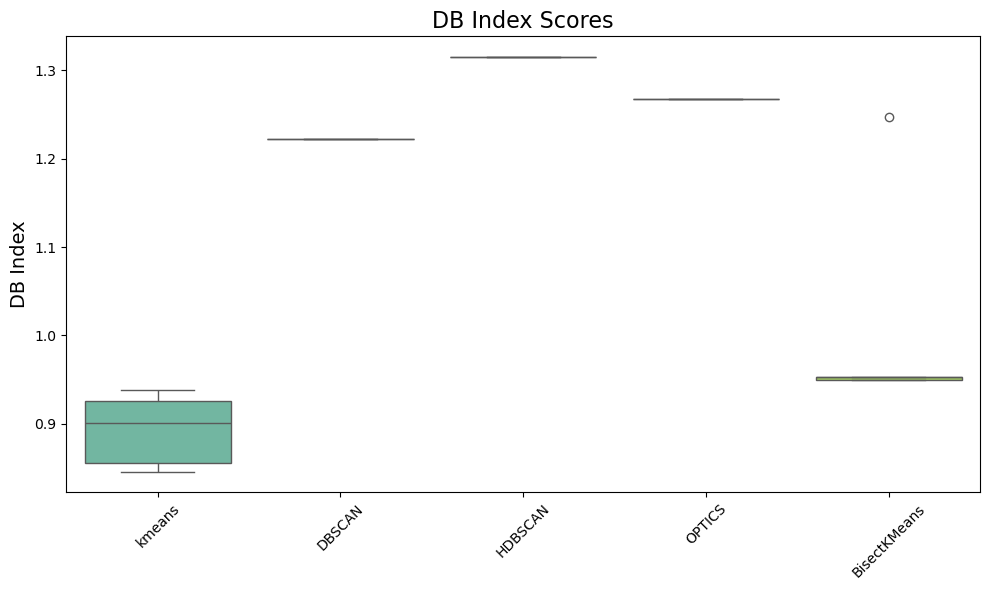

In [234]:
# Plot for Silhouette Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=silhouette_scores, palette="Set2")
plt.title("Silhouette Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Silhouette Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for ARI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_scores, palette="Set2")
plt.title("ARI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ARI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for AMI Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ami_scores, palette="Set2")
plt.title("AMI Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("AMI Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for CH Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=ch_scores, palette="Set2")
plt.title("CH Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("CH Score", fontsize=14)
plt.tight_layout()
plt.show()

# Plot for DB Index Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=db_index_scores, palette="Set2")
plt.title("DB Index Scores", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("DB Index", fontsize=14)
plt.tight_layout()
plt.show()

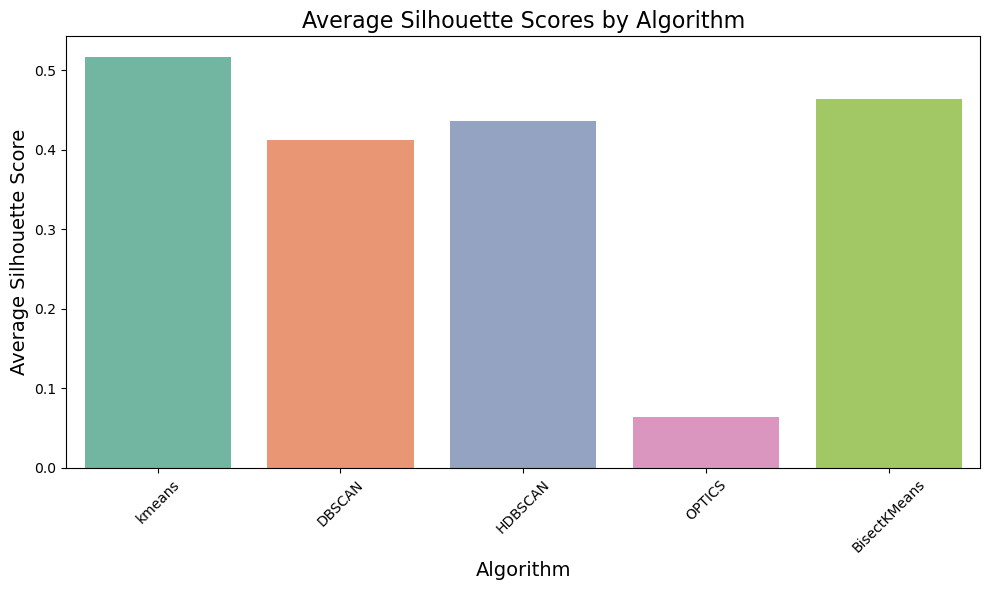

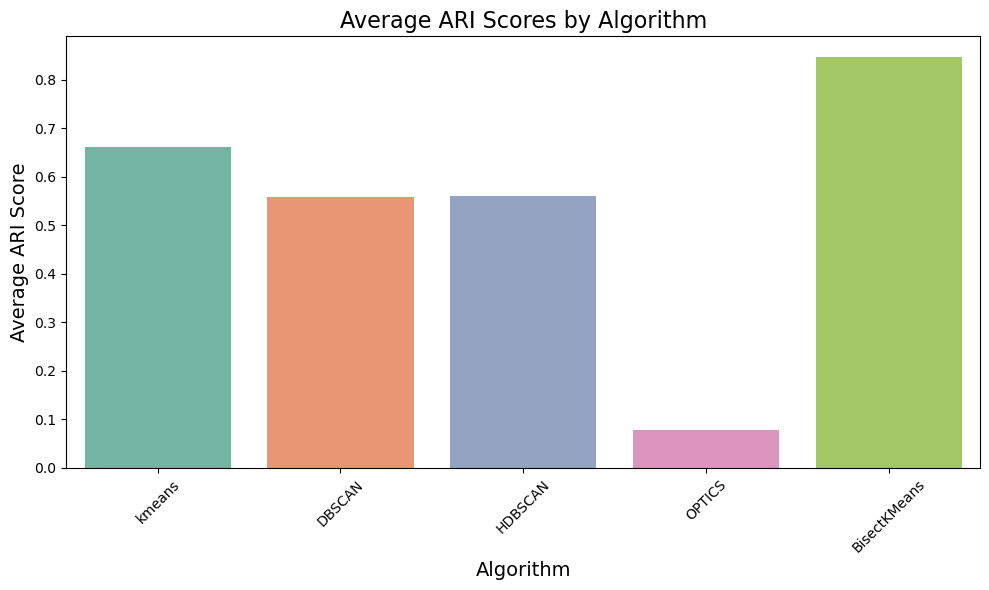

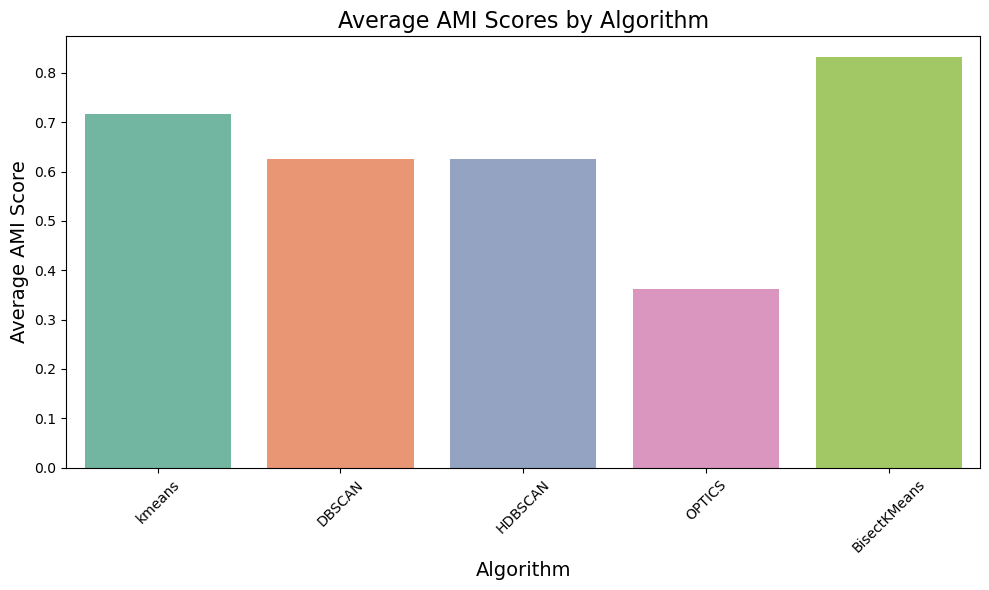

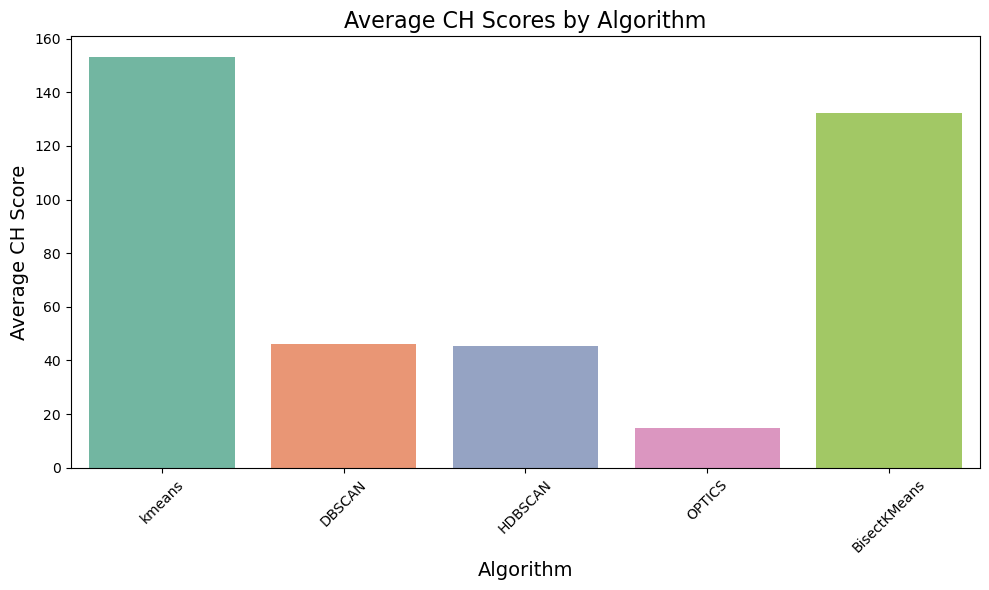

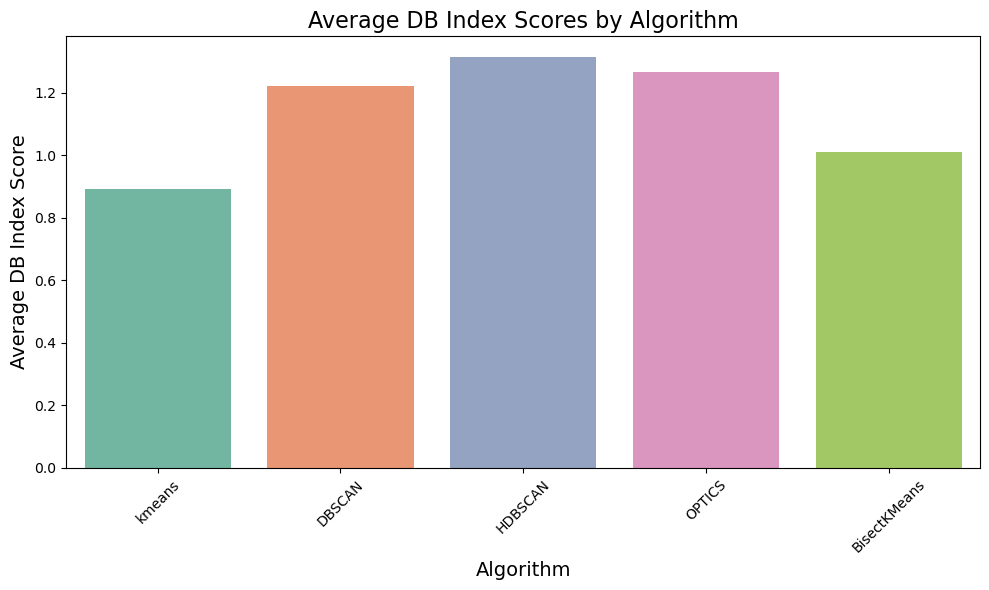

In [235]:
# Calculate averages for all scores
def calculate_average_scores(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}

# Calculate averages for each score
silhouette_avg = calculate_average_scores(silhouette_scores)
ari_avg = calculate_average_scores(ari_scores)
ami_avg = calculate_average_scores(ami_scores)
ch_avg = calculate_average_scores(ch_scores)
db_index_avg = calculate_average_scores(db_index_scores)

# Plot Silhouette Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(silhouette_avg.keys()), y=list(silhouette_avg.values()), palette="Set2")
plt.title("Average Silhouette Scores by Algorithm", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ARI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ari_avg.keys()), y=list(ari_avg.values()), palette="Set2")
plt.title("Average ARI Scores by Algorithm", fontsize=16)
plt.ylabel("Average ARI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMI Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ami_avg.keys()), y=list(ami_avg.values()), palette="Set2")
plt.title("Average AMI Scores by Algorithm", fontsize=16)
plt.ylabel("Average AMI Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot CH Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ch_avg.keys()), y=list(ch_avg.values()), palette="Set2")
plt.title("Average CH Scores by Algorithm", fontsize=16)
plt.ylabel("Average CH Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot DB Index Score averages
plt.figure(figsize=(10, 6))
sns.barplot(x=list(db_index_avg.keys()), y=list(db_index_avg.values()), palette="Set2")
plt.title("Average DB Index Scores by Algorithm", fontsize=16)
plt.ylabel("Average DB Index Score", fontsize=14)
plt.xlabel("Algorithm", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def calculate_averages(scores_dict):
    return {key: np.mean(values) for key, values in scores_dict.items()}
silhouette_avg = calculate_averages(silhouette_scores)
ari_avg = calculate_averages(ari_scores)
ami_avg = calculate_averages(ami_scores)
ch_avg = calculate_averages(ch_scores)
db_avg = calculate_averages(db_index_scores)

comparison_table = pd.DataFrame({
    "Silhouette Score": silhouette_avg,
    "ARI Score": ari_avg,
    "AMI Score": ami_avg,
    "CH Score": ch_avg,
    "DB Score": db_avg,
})

print(comparison_table)

KMeans and BisectingKMeans are the top performers across most metrics. KMeans slightly outperforms BisectingKMeans in terms of silhouette and Calinski-Harabasz (CH) scores, indicating it creates the most well-separated and compact clusters. On the other hand, BisectingKMeans excels in ARI, AMI, and Davies-Bouldin (DB) index, suggesting that it aligns better with the true labels and forms better-defined clusters with minimal overlap. In contrast, DBSCAN, HDBSCAN, and OPTICS show weaker results, particularly with lower ARI and AMI scores. This suggests that these models fail to create clusters that match the true structure of the data, indicating they are less effective in clustering the data compared to KMeans and BisectingKMeans.